### The irreducible mass of black holes.

This is an example that comes straight out of [my research](https://arxiv.org/abs/2202.08848) in general relativity (and was first worked out by Cecilia Fabbri in her BSc thesis with me).

Consider a rotating black hole. In [1969](https://ui.adsabs.harvard.edu/abs/1969NCimR...1..252P/abstract), Roger Penrose (now [Nobel Prize in Physics](https://www.nobelprize.org/prizes/physics/2020/penrose/facts/) for the theory of black holes) discovered that one can extract energy from a rotating black hole:

![](https://inspirehep.net/files/268d28446b405e134199d84f67c23792)

(figure from [Harada, Kimura 2014](https://ui.adsabs.harvard.edu/abs/2014CQGra..31x3001H/abstract)).

Maybe some of you has seen this already in your GR class? In any case, a rotating black-hole has a region called ergosphere such that infalling particles have negative energy. Penrose imagined a particle that enters that region and decays: half will fall in and half will escape to infinity, carring some energy with it. In a nutshell, we've extracted energy=mass from a black hole! It turns out that one also has to extract angular momentum, not just energy (and here you'll need some GR do to this calculation, see e.g. the famous textbook by [Misner, Thorne and Weeler](https://press.princeton.edu/books/hardcover/9780691177793/gravitation). But angular momentum runs our first, such that a repeated series of Penrose processes leaves behind a non-rotating BH with a remnant mass which is called "irreducible". This is a famous result by [Christodoulou 1970](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.25.1596) and is closely related to the even more famous area law by [Hawking (1971)](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.26.1344) (which in turns is the foundation of black-hole thermodynamics).


For a BH of mass $M$ spin $\chi\in [0,1]$, the irreducible mass is 
\begin{equation}
M_{\rm irr} = %\sqrt{\frac{M^2+\sqrt{M^4-S^2}}{2}} = 
 M \sqrt{\frac{1+\sqrt{1-\chi^2}}{2}}
\label{mirrdef}
\end{equation}
For convenience, let us define $f= M_{\rm irr}/M$

Suppose you have repeated measurment of $M$ and $\chi$. This is just because we're still frequentists for now. When we put our Bayesian hat on, these distributions will be the *posterior samples* from a single measurement.

Let's assume that

- the spin $\chi$ is uniformly distributed between 0 and 1.
- the mass $M$ is normally distributed with mean $\mu$ and standard deviation $\sigma$.

These are simplistic assumption that, however, are not too far from what we are now measuring with gravitational-wave detectors. It's a toy model, but not a totally unreasonable one.

**Tasks**:

1. Start with a value of $\sigma=0.02$. Note that $\mu$ is a scale and not a parameter: you can normalize all quantities with a dimension of mass by $\mu$. Just set $\mu=1$ in your code and remember that all masses in the problem are measured in units of $\mu$. 

2. Plot the resulting pdf of $M_{\rm irr}$. First try an histogram with one the rules of thumb we've seen above.

*Hint*: You don't know the functional form of the pdf of $M_{\rm irr}$... but you don't need it if you just want to generate samples! That's the nice thing about numerics!

3. Using the same samples, plot the $M_{\rm irr}$ using a KDE.

4. Compute the KS distance between ${M_{\rm irr}}$ and ${f}$ as a function of $\sigma$. Discuss the limits at large and small values of $\sigma$. 

5. Compute the KS distance between ${M_{\rm irr}}$ and $M$ as a function of $\sigma$. Discuss the limits at large and small values of $\sigma$.

6. You should find that (i) $M_{\rm irr}$ is distributed like $f$ if ${\sigma}\ll \mu$ and (ii) $M_{\rm irr}$ is distributed like $M$ if  $\sigma\gg \mu$.


7. (At home...)  Compute the pdfs of $M_{\rm irr}$ from their mathematical definitions, plot them, and check they agree with your KDE.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn.mixture import GaussianMixture
from tqdm import tqdm
from astropy.visualization.hist import hist as fancyhist
from sklearn.neighbors import KernelDensity

plt.rcParams['figure.figsize']=(7,5) 
plt.rcParams['font.size']=16 
plt.rcParams['font.family']='Liberation Serif' 
plt.rcParams['figure.autolayout']=True 
plt.rcParams['mathtext.fontset'] = 'cm'

Text(0.5, 0, 'M/$\\mu$')

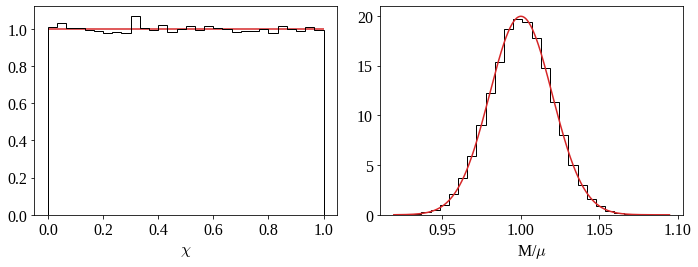

In [2]:
#parameters
mu = 1
sigma = 0.02
N = 100000

#generate chi uniformly in the range [0, 1]
chi = np.random.random(N)

#generate M from a Gaussian distribution
gauss = scipy.stats.norm(loc=mu,scale=sigma)
M = gauss.rvs(N)

#draw the distribution
figure, ax = plt.subplots(1, 2, figsize = (10, 4))
ax[0].hist(chi, bins = 30, density = True, histtype = 'step', color = 'k')
ax[1].hist(M, bins = 30, density = True, histtype = 'step', color = 'k')
ax[0].hlines(xmin = 0, xmax = 1, y = 1, color = 'tab:red')
x = np.linspace(np.min(M), np.max(M), 1000)
ax[1].plot(x, gauss.pdf(x), c = 'tab:red')
ax[0].set_xlabel(r'$\chi$')
ax[1].set_xlabel(r'M/$\mu$')

Text(0.5, 0, 'M$_{irr}/\\mu$')

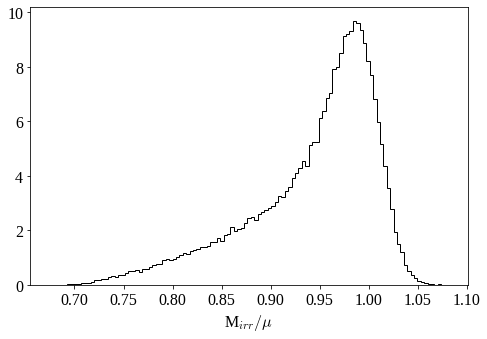

In [3]:
#define f = M_irr/M
def f(chi):
    return np.sqrt((1+np.sqrt(1-chi**2))/2)

M_irr = M*f(chi)

from astropy.visualization.hist import hist as fancyhist
_ = fancyhist(M_irr, bins = 'freedman', density = True, histtype = 'step', color = 'k');
plt.xlabel(r'M$_{irr}/\mu$')

In [5]:
from sklearn.model_selection import GridSearchCV

kde_skl = KernelDensity(kernel='gaussian')
bw_range = np.linspace(0.001, 0.1, 20)
grid = GridSearchCV(kde_skl, {'bandwidth': bw_range}, scoring=None, refit=True, cv=10, verbose=2, n_jobs = -1)
grid.fit(M_irr[:, np.newaxis])
bw_best = grid.best_params_['bandwidth']

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 28.4min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 40.9min finished


In [6]:
print('From cross-validation the best bandwidth is', bw_best)

From cross-validation the best bandwidth is 0.006210526315789474


Text(0.5, 0, 'M$_{irr}/\\mu$')

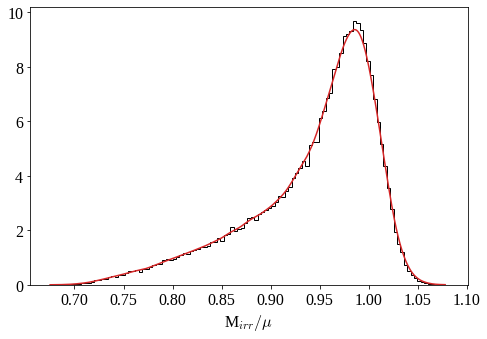

In [7]:
bw_best = 0.006210526315789474
def kde_sklearn(data, bandwidth, kernel, x):
    kde_skl = KernelDensity(bandwidth = bandwidth, kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(x[:, np.newaxis]) # sklearn returns log(density)

    return np.exp(log_pdf)

x = np.linspace(np.min(M_irr), np.max(M_irr), 1000)
pdf = kde_sklearn(M_irr, bw_best, "gaussian", x)

_ = fancyhist(M_irr, bins = 'freedman', density = True, histtype = 'step', color = 'k');
plt.plot(x, pdf, c = 'tab:red')
plt.xlabel(r'M$_{irr}/\mu$')

In [8]:
sigmas = np.logspace(-4, 4, 100)

ksf = []
ksM = []
F = f(chi)

for sigma in sigmas:
    M = scipy.stats.norm(loc=mu,scale=sigma).rvs(N)
    
    ksf.append(scipy.stats.ks_2samp(F, M*F))
    ksM.append(scipy.stats.ks_2samp(M, M*F))

ksf = np.array(ksf)
ksM = np.array(ksM)

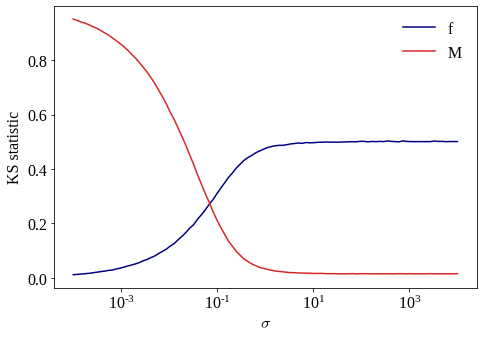

In [9]:
plt.plot(sigmas, ksf[:, 0], color = 'navy', label = 'f')
plt.plot(sigmas, ksM[:, 0], color = 'tab:red', label = 'M')
plt.xscale('log')
plt.xlabel('$\sigma$')
plt.ylabel('KS statistic')
plt.legend(frameon = False)

For small values of $\sigma$ the KS statistic distance between M$_{irr}$ and $f$ goes to zero, so M$_{irr}$ is distributed as $f$; for large values of $\sigma$ M$_{irr}$ is instead distributed as M

To find the analytical distribution of M$_{irr}$, first compute the distribution of $f$:
$$p(f) = \left|\frac{d\chi}{df}\right|p(\chi) = \left|\frac{d}{df}\biggl(2f\sqrt{1-f^2}\biggr)\right|p(\chi) = 2 \frac{2f^2-1}{\sqrt{1-f^2}}$$

Then we have M$_{irr}$ = M $ \cdot f$ so

$$p(M_{\rm irr})  = \int_{1/\sqrt{2}}^1 p_f(f)\cdot p_M\biggl(\frac{M_{irr}}{f}\biggr) \cdot \frac{1}{f}df =
\int_{1/\sqrt{2}}^1 2\frac{2 f^2-1}{f \sqrt{1 - f^2}} \cdot \frac{1}{\sigma\sqrt{2\pi}}\exp\left[{-\frac{(M_{\rm irr}/f -\mu)^2}{2\sigma^2}}\right]  \frac{1}{f}  \,\, {\rm d}f\,. $$

where the extremes of integration are the minimum and maximum values of $f$ corresponding to the maximum and minimum values of $\chi$ ($f(1) = 1/\sqrt{2}$ and $f(0) = 1$). This is since if $Z = XY$, $f(X)=pdf(X)$, $g(Y)=pdf(Y)$ then

$$
pdf(Z) = \int_{-\infty}^{+\infty} f(X)g\biggl(\frac{Z}{X}\biggr)\frac{1}{|X|}dX
$$

In [10]:
sigma = 0.02

def function(f,x):
    return ((2/np.pi)**(1/2))/sigma*np.exp(-(x/f-1)**2/(2*sigma**2))*(2*f**2-1)/(1-f**2)**(1/2)/f

Mirr_analytical = [scipy.integrate.quad(lambda f: function(f,y), 1/2**0.5,1)[0] for y in tqdm(x)]

100%|██████████| 1000/1000 [00:00<00:00, 2080.83it/s]


Text(0, 0.5, 'p($M_{irr}$)')

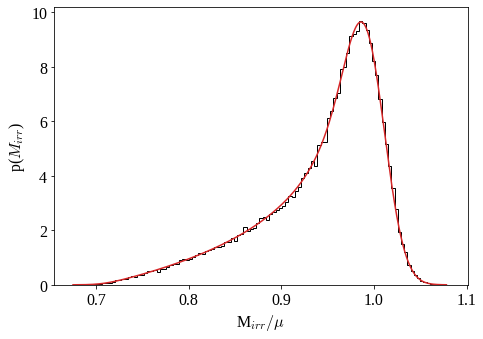

In [11]:
#plot the histogram
_ = fancyhist(M_irr, bins = 'freedman', density = True, histtype = 'step', color = 'k');

#plot the analytical distribution
plt.plot(x,Mirr_analytical, c = 'tab:red')
plt.xlabel(r'M$_{irr}/\mu$')
plt.ylabel('p($M_{irr}$)')

Text(0, 0.5, 'Residuals')

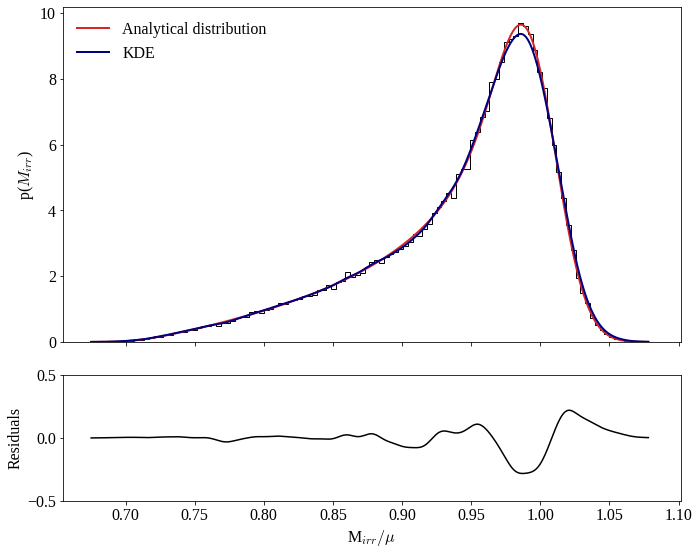

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False, figsize=(10,8), gridspec_kw={'height_ratios': [8, 3]})

#plot the histogram
_ = fancyhist(M_irr, bins = 'freedman', density = True, histtype = 'step', edgecolor='w', alpha = 0.7);

#plot the analytical distribution
ax[0].hist(M_irr, bins = _[1], density = True, histtype = 'step', color = 'k')
ax[0].plot(x,Mirr_analytical, c = 'tab:red', label='Analytical distribution', lw=2)
ax[0].set_ylabel('p($M_{irr}$)')
#plot the kde
ax[0].plot(x, pdf, c = 'navy', label='KDE', lw=2)
ax[0].legend(frameon=False)

ax[1].plot(x, (pdf-Mirr_analytical), c='k')
ax[1].set_ylim([-0.5, 0.5])
ax[1].set_xlabel(r'M$_{irr}/\mu$')
ax[1].set_ylabel('Residuals')